# Raw Extraction of required data 

Note that the raw extraction of required data takes a very long time, the import of pre-computed values is avaliable at the Plotting Code section.

In [46]:
import pandas as pd
import numpy as np
import tqdm
import csv
from datetime import datetime

In [47]:
# Defining the list indexes
indexes = {
    'Malware':0,
    'Phishing':1,
    'Exploits':2,
    'Fraudlent Services':3,
    'Unwanted Programs':4,
    'Spammers':5,
    'Unlabelled':6,
}

attack_map = ['Malware', 'Phishing', 'Exploits', 'Fraudlent Services',
            'Unwanted Programs', 'Spammers', 'Unlabelled']

In [48]:
# Convert date fields back into a python date object
date_calculation_cache = {}
def make_date(day, month, year, iso=True):
    date = '%s-%s-%s' % (day, month, year)
    # Check cache before recomputation
    if date not in date_calculation_cache:
        if iso:
            cal = datetime.strptime(date, "%d-%m-%Y").isocalendar()
        else:
            cal = datetime.strptime(date, "%d-%m-%Y")
        date_calculation_cache[date] = cal
    else:
        cal = date_calculation_cache[date]
    return cal

In [60]:
# Track inter-host relationships
ip_in_cc = {}
asn_in_cc = {}
for attk in indexes:
    ip_in_cc[attk] = {}
    asn_in_cc[attk] = {}

In [61]:
# Initialise a dictionary to hold all our data.
# We will later convert this into a pandas dataframe for easy processing
ip_attacks = {}

for attack in indexes:
    print(attack)
    files = []
    if attack == 'Unlabelled':
        # There are 23 files containing Unlabelled reports
        for i in range(23):
            files.append(('./../../Datastore/%s_reports_%s.csv'%(attack,i), attack, i))
    else:
        #continue
        files.append(('./../../Datastore/%s_reports.csv'%attack, attack, None))
    #########################
    
    # Process the files
    for file_name, a, file_num in files:
        print(file_name)
        with open(file_name) as data_file:
            filereader = csv.reader(data_file)
            if attack == 'Unlabelled':
                activity_relabel = pd.read_csv('./../../Unlabelled_predictions/%s_predictions_%s.csv'%(a, file_num),
                                               index_col=[0], header=None)
                activity_relabel = activity_relabel.transpose().values[0]
            for n, report in enumerate(tqdm.tqdm(filereader)):
                try:
                    # Unpack Row information
                    splits = report[0:9]

                    day = splits[5]
                    month = splits[6]
                    year = splits[7]
                    datasource = splits[8]        
                    org = splits[3]
                    asn = splits[2]
                    cc = splits[1]
                    ip = splits[0]
                    
                    # Compute week bins
                    cal = make_date(day, month, year, iso=False)
                    year_num, week_num, weekday_num = cal.isocalendar()

                    # Invalid Timestamp, likely 0.
                    if year_num == 1970:
                        continue
                    week = (year_num-1970)*52 + week_num

                except Exception, e: 
                    print(str(e))

                if ip is None or ip == '':
                    print("Skipping invalid IP: %s" % ip)
                    continue
                
                # Relabelling unlabelled reports
                if (attack == 'Unlabelled'):
                    attack_label = attack_map[activity_relabel[n]]
                else:
                    attack_label = attack

                # Initialise the holder
                key = cc
                if key not in ip_attacks:
                    ip_attacks[key] = [0] * 7

                # Increment the relevant list position
                i = indexes[attack_label]
                ip_attacks[key][i] += 1
                
                if cc not in ip_in_cc[attack_label]:
                    ip_in_cc[attack_label][cc] = set([])
                ip_in_cc[attack_label][cc].add(ip)
                if cc not in asn_in_cc[attack_label]:
                    asn_in_cc[attack_label][cc] = set([])
                asn_in_cc[attack_label][cc].add(asn)

print('Finished')

6918it [00:00, 58453.25it/s]
0it [00:00, ?it/s]

Spammers
./../../Datastore/Spammers_reports.csv
Malware
./../../Datastore/Malware_reports.csv


3190529it [01:09, 46200.87it/s]
5458it [00:00, 54557.03it/s]

Exploits
./../../Datastore/Exploits_reports.csv


201108it [00:05, 35627.54it/s]
5629it [00:00, 56264.70it/s]

Phishing
./../../Datastore/Phishing_reports.csv


2382889it [00:41, 56957.64it/s]
5129it [00:00, 51266.83it/s]

Fraudlent Services
./../../Datastore/Fraudlent Services_reports.csv


829301it [00:12, 66149.59it/s]
2764it [00:00, 27614.02it/s]

Unwanted Programs
./../../Datastore/Unwanted Programs_reports.csv


698700it [00:08, 81143.09it/s]


Unlabelled
./../../Datastore/Unlabelled_reports_0.csv


2000138it [00:29, 68433.31it/s]


./../../Datastore/Unlabelled_reports_1.csv


2000007it [00:25, 78459.76it/s]


./../../Datastore/Unlabelled_reports_2.csv


2000047it [00:25, 79097.54it/s]


./../../Datastore/Unlabelled_reports_3.csv


2000022it [00:29, 67441.45it/s]


./../../Datastore/Unlabelled_reports_4.csv


2000471it [00:23, 83487.92it/s]


./../../Datastore/Unlabelled_reports_5.csv


2000567it [00:25, 77584.08it/s]


./../../Datastore/Unlabelled_reports_6.csv


2000130it [00:26, 75025.69it/s]


./../../Datastore/Unlabelled_reports_7.csv


2000541it [00:33, 59929.02it/s]


./../../Datastore/Unlabelled_reports_8.csv


2000282it [00:28, 69674.57it/s]


./../../Datastore/Unlabelled_reports_9.csv


2000016it [00:34, 58066.87it/s]


./../../Datastore/Unlabelled_reports_10.csv


2000165it [00:42, 46970.21it/s]


./../../Datastore/Unlabelled_reports_11.csv


2000021it [00:34, 58089.67it/s]


./../../Datastore/Unlabelled_reports_12.csv


2000114it [00:32, 61895.43it/s]


./../../Datastore/Unlabelled_reports_13.csv


2000038it [00:40, 49886.95it/s]


./../../Datastore/Unlabelled_reports_14.csv


2000304it [00:38, 52041.81it/s]


./../../Datastore/Unlabelled_reports_15.csv


2000019it [00:39, 51163.64it/s]


./../../Datastore/Unlabelled_reports_16.csv


2000455it [00:45, 44034.82it/s]


./../../Datastore/Unlabelled_reports_17.csv


2000040it [00:41, 48262.75it/s]


./../../Datastore/Unlabelled_reports_18.csv


2000023it [00:31, 62914.54it/s]


./../../Datastore/Unlabelled_reports_19.csv


2000058it [00:44, 45333.10it/s]


./../../Datastore/Unlabelled_reports_20.csv


2000016it [00:35, 56950.42it/s]


./../../Datastore/Unlabelled_reports_21.csv


2000294it [00:36, 55427.07it/s]


./../../Datastore/Unlabelled_reports_22.csv


332782it [00:05, 65549.03it/s]

Finished


In [62]:
# save inter-host relationships
import cPickle
cPickle.dump(ip_in_cc, open('ip_in_cc.pickle', 'wb'))
cPickle.dump(asn_in_cc, open('asn_in_cc.pickle', 'wb'))

# Generate DataFrame

In [10]:
################################
# CC Filter
import pandas as pd
# Turn into a pandas array
ip_attack_frame = pd.DataFrame.from_dict(ip_attacks, orient='index')
# relabel the colum names
ip_attack_frame.columns = attack_map
# Drop invalid CCs
ip_attack_frame.drop('--',inplace=True)
ip_attack_frame.drop('xx',inplace=True)
ip_attack_frame.drop('A1',inplace=True)
ip_attack_frame.drop('unknown',inplace=True)

In [11]:
# Save the DataFrame
ip_attack_frame.to_csv('cc_attack_frame.csv')

# Plotting code

## Import precomputed data

In [13]:
import pandas as pd
ip_attack_frame = pd.read_csv('cc_attack_frame.csv', index_col=0)

## Top offending CCs

In [14]:
if 'Totals' in ip_attack_frame:
    ip_attack_frame.drop('Totals', axis=1,inplace=True)

ip_attack_frame['Totals'] = ip_attack_frame.transpose().sum()

ip_attack_frame[['Totals','Malware','Phishing','Spammers',
                 'Unwanted Programs','Exploits','Fraudlent Services']
               ].sort_values('Totals', ascending=False).head(10)

,Totals,Malware,Phishing,Spammers,Unwanted Programs,Exploits,Fraudlent Services
US,42187267,38908052,1656115,2629,797875,100311,722285
DE,1473335,1295458,105387,364,13848,9021,49257
CN,1316934,984788,315861,249,3038,4670,8328
FR,1274328,1185669,35474,121,7658,18792,26614
NL,405318,343823,23138,271,7208,7501,23377
RU,333726,235166,17826,1656,2169,10874,66035
UA,242539,215401,12350,385,443,6111,7849
VG,207125,165974,9176,642,1169,10212,19952
IT,164775,140413,16987,40,954,1358,5023
SE,157317,139948,12658,3,1016,468,3224


## Unique CC Summary

In [15]:
a = ip_attack_frame.drop('Totals',axis=1)
a = a.transpose().sum()
a = a[a > 0]
labelled_len = len(a)
full_len = len(ip_attack_frame)

print '%20s:%10s: %7s: %6s'%('Attack','Unique','Ratio','%')

# Attack Label
for attk in indexes:
    if attk == 'Unlabelled':
        continue
    attk_len = len(ip_attack_frame[attk][ip_attack_frame[attk]>0])
    ratio = 1.0*attk_len/labelled_len
    percent = ratio*100.0
    print '%20s:%10s: %0.5f: %6.2f'%(attk,attk_len,ratio,percent)

# Labelled
ratio = 1.0*labelled_len/full_len
percent = ratio*100.0
print '%20s:%10s: %0.5f:% 6.2f'%('Labelled',labelled_len,ratio,percent)
    
print '%20s:%10s: %0.5f:% 6.2f'%('Totals',full_len,1.0,100.0)

              Attack:    Unique:   Ratio:      %
            Spammers:        60: 0.30303:  30.30
             Malware:       196: 0.98990:  98.99
            Exploits:       112: 0.56566:  56.57
            Phishing:       139: 0.70202:  70.20
  Fraudlent Services:       118: 0.59596:  59.60
   Unwanted Programs:        81: 0.40909:  40.91
            Labelled:       198: 1.00000: 100.00
              Totals:       198: 1.00000: 100.00


## Graph Plotting Parameters

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import dateutil.relativedelta

plot_properties_indexes = {
    'Unwanted Programs':{'color':'b', 'linestyle':'-', 'label':'PUP',
                         'marker':'s', 'hatch':'//'},

    'Fraudlent Services':{'color':'y', 'linestyle':'-', 'label':'Fraud. Serv.',
                          'marker':'*','hatch':'\\'},

    'Malware':{'color':'r', 'linestyle':'-', 'label':'Malware',
               'marker':'x', 'hatch':'x'},

    'Exploits':{'color':'m', 'linestyle':'-', 'label':'Exploits',
                'marker':'+', 'hatch':'+'},

    'Phishing':{'color':'g', 'linestyle':'-', 'label':'Phishing',
                'marker':'^', 'hatch':'|'},

    'Spammers':{'color':'c', 'linestyle':'-', 'label':'Spammers',
                'marker':'D', 'hatch':'\\\\'},

    'Unlabelled':{'color':'w', 'linestyle':'-', 'label':'Unlabelled',
                  'marker':'T', 'hatch':'///'},

    'Totals':{'color':'k', 'linestyle':'-', 'label':'Total',
              'marker':'o', 'hatch':''}
}

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cPickle

def cdf(data, m,n,s,lstring):

    data_size=len(data)

    # Set bins edges
    data_set=sorted(set(data))
    bins=np.append(data_set, data_set[-1]+1)

    # Use the histogram function to bin the data
    counts, bin_edges = np.histogram(data, bins=bins, density=False)
    #print counts
    #print bin_edges
    counts=counts.astype(float)/data_size

    markers_on = bins[0]
    # Find the cdf
    cdf = np.cumsum(counts)
    
    # Plot the cdf
    plt.plot(bin_edges[0:-1], cdf,linestyle='%s'%n, color='%s'%m,marker='%s'%s,markevery=0.1, label=lstring)    
    plt.ylim((0,1))

## CDF of CC Reports

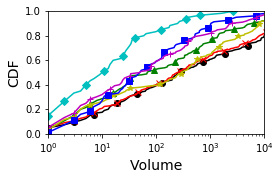

In [64]:
a = ip_attack_frame.drop('Totals',axis=1)
if 'Totals' in a:
    a.drop('Totals', axis=1,inplace=True)

a['Totals'] = a.transpose().sum()
a = a[a['Totals']>0]
final_df = a
    
plt.figure(figsize=(4,2.6))

for attk in ['Totals', 'Malware', 'Phishing', 'Fraudlent Services', 'Unwanted Programs', 
             'Exploits', 'Spammers']:
    a = final_df[attk][final_df[attk]!=0]
    linestyle = plot_properties_indexes[attk]['linestyle']
    color = plot_properties_indexes[attk]['color']
    label = plot_properties_indexes[attk]['label']
    marker = plot_properties_indexes[attk]['marker']
    
    cdf(a, color, linestyle, marker, label)

plt.ylabel("CDF",fontsize=14)
plt.xlabel("Volume",fontsize=14)

plt.xscale('log')
plt.xlim(1, 10000)
plt.ylim(0)
#plt.legend(loc='lower right', frameon=False)

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.savefig("./figures/cc_attack_cdf.pdf",bbox_inches='tight')
plt.show()

# Additional Analysis

In [65]:
# Top CCs but total number of reports
final_df[['Totals','Malware','Phishing','Spammers','Unwanted Programs','Exploits','Fraudlent Services']].sort_values('Totals', ascending=False).head(10)

,Totals,Malware,Phishing,Spammers,Unwanted Programs,Exploits,Fraudlent Services
US,42187267,38908052,1656115,2629,797875,100311,722285
DE,1473335,1295458,105387,364,13848,9021,49257
CN,1316934,984788,315861,249,3038,4670,8328
FR,1274328,1185669,35474,121,7658,18792,26614
NL,405318,343823,23138,271,7208,7501,23377
RU,333726,235166,17826,1656,2169,10874,66035
UA,242539,215401,12350,385,443,6111,7849
VG,207125,165974,9176,642,1169,10212,19952
IT,164775,140413,16987,40,954,1358,5023
SE,157317,139948,12658,3,1016,468,3224


In [66]:
# Proportion of CCs with more than 1 reports
attk = 'Totals'
print('\n' + attk)
over_1 = len(final_df[final_df[attk] > 1])
total = len(final_df[final_df[attk] != 0])
print(over_1)
print(total)
print(1.0*over_1/total)

print "Mean reports per CC"
print(final_df[attk].mean())


Totals
188
198
0.949494949495
Mean reports per CC
247909.111111


In [67]:
# Proportion of CCs with more than one report
for attk in indexes:
    if attk == 'Unlabelled':
        continue
    print('\n' + attk)
    over_1 = len(final_df[final_df[attk] > 1])
    total = len(final_df[final_df[attk] != 0])
    print(over_1)
    print(total)
    print(1.0*over_1/total)


Spammers
51
60
0.85

Malware
186
196
0.948979591837

Exploits
106
112
0.946428571429

Phishing
133
139
0.956834532374

Fraudlent Services
114
118
0.966101694915

Unwanted Programs
80
81
0.987654320988


In [69]:
# Proportion of CCs with 10 or more reports
attk = 'Totals'
print('\n' + attk)
over_1 = len(final_df[final_df[attk] > 9])
total = len(final_df[final_df[attk] != 0])
print(over_1)
print(total)
print(1.0*over_1/total)

print "Mean reports per CC"
print(final_df[attk].mean())


Totals
164
198
0.828282828283
Mean reports per CC
247909.111111


In [34]:
# Proportion of CCs with more than 10K reports
attk = 'Totals'
print('\n' + attk)
over_1 = len(final_df[final_df[attk] > 10000])
total = len(final_df[final_df[attk] != 0])
print(over_1)
print(total)
print(1.0*over_1/total)

print "Mean reports per CC"
print(final_df[attk].mean())


Totals
40
198
0.20202020202
Mean reports per CC
247909.111111


In [80]:
# Proportion of CCs with the most spamming reports
attk = 'Spammers'
print('\n' + attk)
over_1 = len(final_df[final_df[attk] > 1])
total = len(final_df[final_df[attk] != 0])
print(over_1)
print(total)
print(1.0*over_1/total)

print "Mean reports per CC"
print(final_df[attk].mean())

total_reports = sum(final_df[attk].values)

print "\nSpammer contrbution by country"
print(final_df[attk].sort_values(ascending=False).head(10)/total_reports)


Spammers
51
60
0.85
Mean reports per CC
37.4595959596

Spammer contrbution by country
US    0.354456
RU    0.223271
VG    0.086558
UA    0.051908
DE    0.049076
NL    0.036538
CN    0.033572
GB    0.024269
HK    0.023325
FR    0.016314
Name: Spammers, dtype: float64


In [70]:
# Breakdown of Virgin islands Contributions
print(final_df.loc['VG'])
print(final_df.loc['VG']/final_df.loc['VG'].drop('Totals').sum()) 

Malware               165974
Phishing                9176
Exploits               10212
Fraudlent Services     19952
Unwanted Programs       1169
Spammers                 642
Unlabelled                 0
Totals                207125
Name: VG, dtype: int64
Malware               0.801323
Phishing              0.044302
Exploits              0.049304
Fraudlent Services    0.096328
Unwanted Programs     0.005644
Spammers              0.003100
Unlabelled            0.000000
Totals                1.000000
Name: VG, dtype: float64


In [71]:
# US contirbution of PUPs
attk = 'Unwanted Programs'
cc_contrib = final_df.loc['US'][attk]
total_attk = final_df[attk].sum()
print(cc_contrib)
print(total_attk)
print(1.0*cc_contrib/total_attk)

797875
847223
0.9417532338


In [72]:
# US contirbution of PUPs
attk = 'Spammers'
cc_contrib = final_df.loc['US'][attk]
total_attk = final_df[attk].sum()
print(cc_contrib)
print(total_attk)
print(1.0*cc_contrib/total_attk)

2629
7417
0.354455979507
